# Problem to Solve:

What are the factors that contribute to the success of a mobile app on the Google Play Store? Can we identify any trends in the app market that can help in app development and marketing?

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [4]:
# Load the datasets
apps = pd.read_csv("C:\\Users\\terre\\Downloads\\googleplaystore.csv")

In [5]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning and Preporcessing

In [7]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
# Handle missing values
apps.dropna(subset=['Type', 'Content Rating', 'Android Ver', 'Current Ver'], inplace=True)
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)

In [12]:
apps.shape

(10829, 13)

In [14]:
# Check for duplicates
apps.duplicated().sum()

483

In [15]:
# Drop duplicates
apps.drop_duplicates(inplace=True)

In [16]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
# Convert data types
apps['Reviews'] = apps['Reviews'].astype(int)
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
apps['Installs'] = apps['Installs'].astype(int)
apps['Price'] = apps['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
apps['Price'] = apps['Price'].astype(float)

In [18]:
# Remove outliers
apps = apps[apps['Rating'] <= 5]

In [19]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
#save cleaned dataset
apps.to_csv('playstore_data.csv')

# Exploratory Data Analysis

In [21]:
# Group the data by category and count the number of apps in each category
cat_apps = apps.groupby('Category')['App'].count().reset_index()

In [22]:
# Sort the data by the number of apps in each category in descending order
cat_apps = cat_apps.sort_values('App', ascending=False)

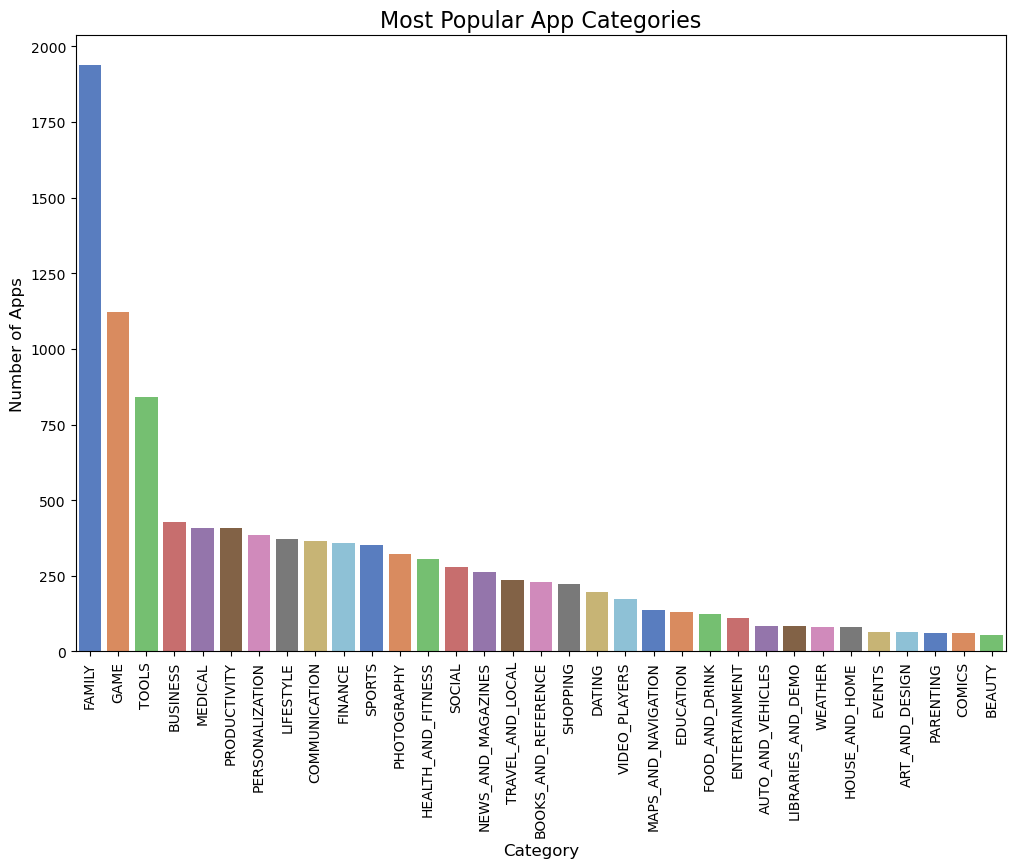

In [23]:
# Plot the data using a bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='Category', y='App', data=cat_apps, palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.title('Most Popular App Categories', fontsize=16)
plt.show()

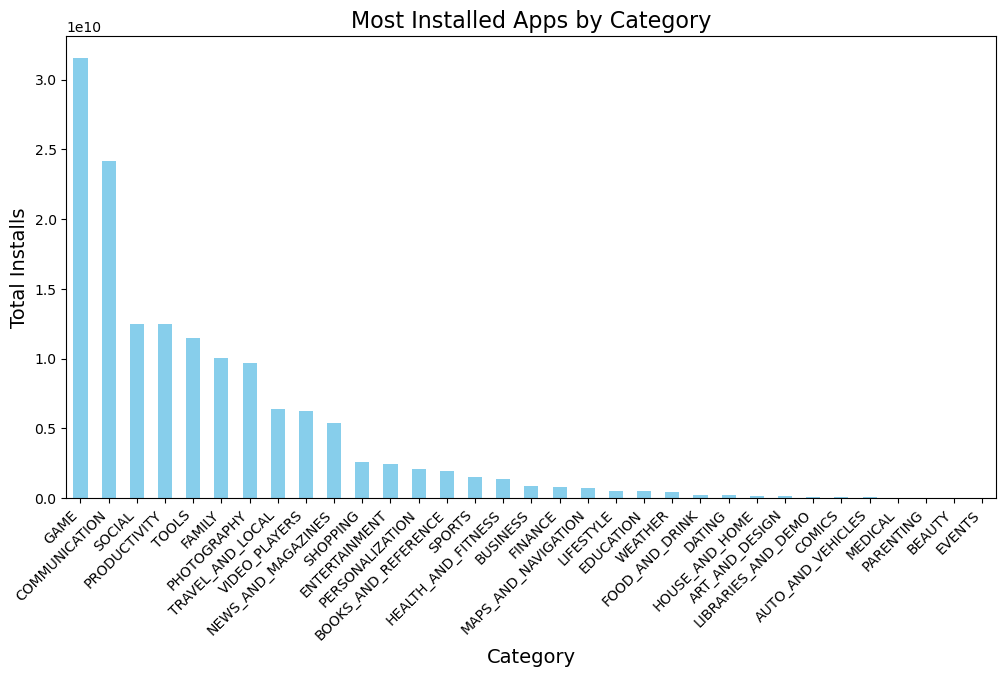

In [27]:
# Group by 'Category' and calculate the total installs
category_installs = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Extract the top 10 categories
top_categories = category_installs

# Create a bar graph to show the most installed apps by category
plt.figure(figsize=(12, 6))
ax = top_categories.plot(kind='bar', color='skyblue')
ax.set_title('Most Installed Apps by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Total Installs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

From the chart, we can make the following observations:

The 'GAME' category has the highest number of installs, followed by the 'COMMUNICATION' and 'TOOLS' categories.
The 'FAMILY' and 'PRODUCTIVITY' categories also have a significant number of installs.
Other categories such as 'SOCIAL', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', and 'VIDEO_PLAYERS' also have relatively high installs.
On the other hand, categories such as 'EVENTS', 'BEAUTY', 'COMICS', 'PARENTING', 'ART_AND_DESIGN', and 'LIBRARIES_AND_DEMO' have relatively lower installs compared to the top categories.
This information can help businesses and app developers understand the popularity of different app categories among users and make informed decisions regarding app development, marketing, and monetization strategies. For example, focusing on popular categories such as 'GAME', 'COMMUNICATION', and 'TOOLS' may yield higher potential for user engagement and revenue generation.

In [ ]:
# Group by 'App' and calculate the average rating
app_ratings = apps.groupby('App')['Rating'].mean().sort_values(ascending=False)

# Extract the top 10 rated apps
top_rated_apps = app_ratings.head(20)

# Create a horizontal bar chart to show the top rated apps
plt.figure(figsize=(10, 6))
ax = top_rated_apps.plot(kind='barh', color='skyblue')
ax.set_title('Top Rated Apps', fontsize=16)
ax.set_xlabel('Average Rating', fontsize=14)
ax.set_ylabel('App', fontsize=14)
plt.show()


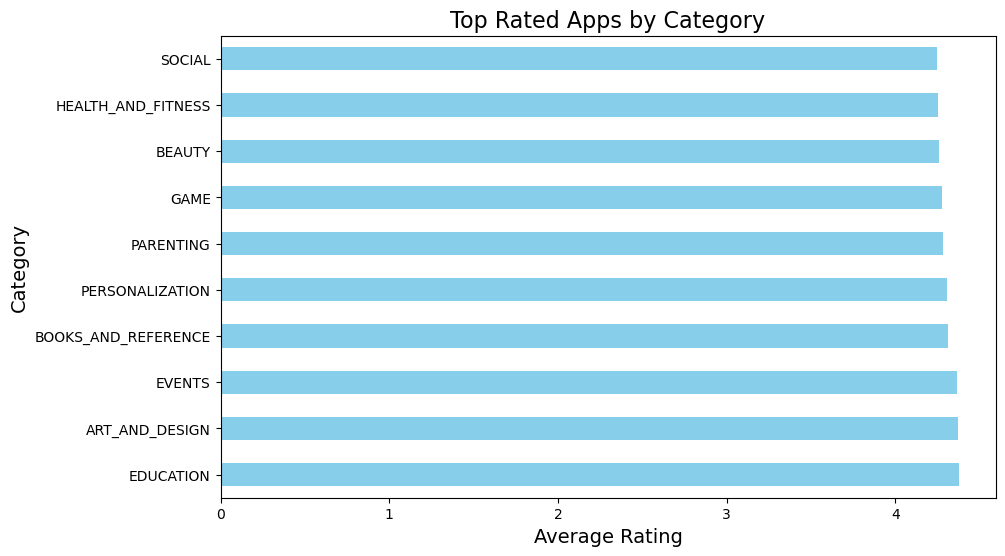

In [31]:
# Group by 'Category' and calculate the average rating
category_ratings = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Extract the top 10 rated categories
top_rated_categories = category_ratings.head(10)

# Create a horizontal bar chart to show the top rated categories
plt.figure(figsize=(10, 6))
ax = top_rated_categories.plot(kind='barh', color='skyblue')
ax.set_title('Top Rated Apps by Category', fontsize=16)
ax.set_xlabel('Average Rating', fontsize=14)
ax.set_ylabel('Category', fontsize=14)
plt.show()

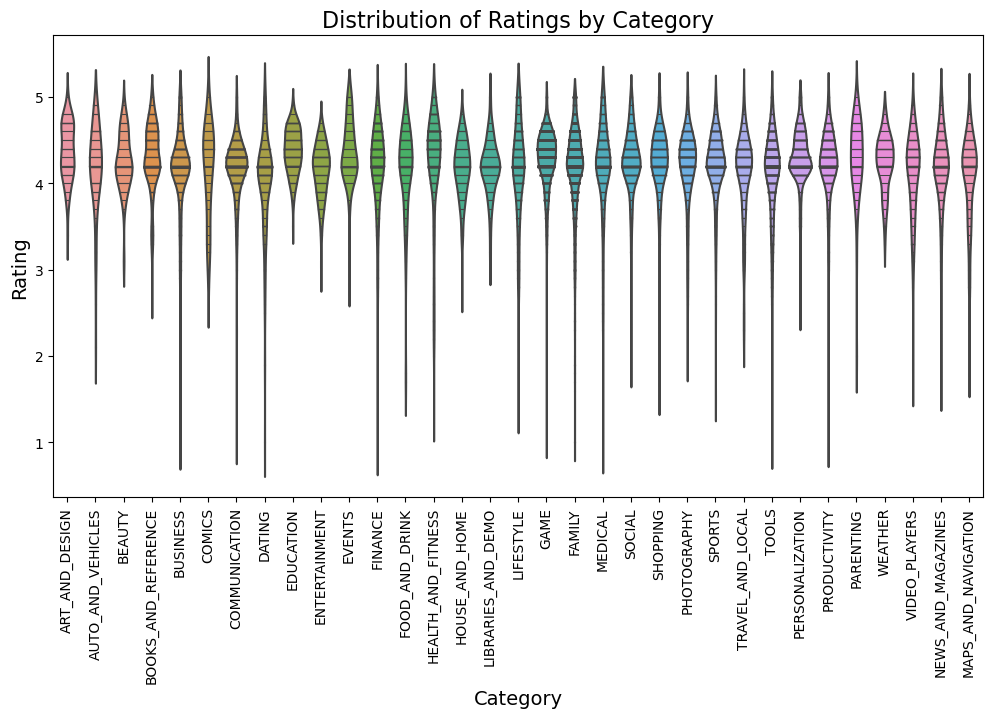

In [32]:

# Create a violin plot to show the distribution of ratings by category
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='Rating', data=apps, inner='stick')
plt.title('Distribution of Ratings by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=90)
plt.show()

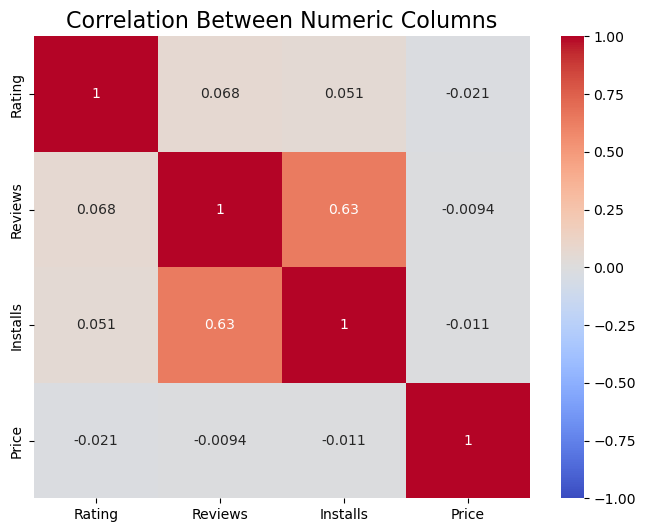

In [33]:
# Calculate the correlation between numeric columns
correlation = apps[['Rating', 'Reviews', 'Installs', 'Price']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Numeric Columns', fontsize=16)
plt.show()

# Summary

Reviews and Installs are positively correlated: The correlation between the number of Reviews and Installs is positive, indicating that as the number of Reviews increases, the number of Installs also tends to increase. This suggests that higher review counts may drive more app installations, and apps with more positive reviews may be more likely to be installed by users.

Rating and Reviews/Installs are weakly correlated: The correlation between the Rating and Reviews/Installs is relatively weak, indicating that there is no strong linear relationship between the Rating of an app and the number of Reviews or Installs it receives. This suggests that factors other than user reviews or installations may influence the overall Rating of an app, such as app quality, features, and user satisfaction.

Price and Reviews/Installs are weakly correlated: The correlation between the Price of an app and the number of Reviews or Installs is also relatively weak, indicating that there is no strong linear relationship between the Price of an app and its popularity in terms of Reviews or Installs. This suggests that users may not base their decision to install or review an app solely on its price, and other factors such as app functionality, user ratings, and app category may also play a significant role.

In conclusion, the findings from the correlation analysis suggest that Reviews and Installs are positively correlated, indicating that higher review counts may lead to more app installations. However, the weak correlation between Rating, Price, and Reviews/Installs suggests that other factors may also influence the popularity and ratings of apps in the 'apps' dataset. Further analysis and consideration of other variables may be needed to make more informed business decisions based on the findings.